# Testing the `stellarflow` class

In [28]:
## Imports
import stellarflow as stf
import numpy as np

## Settings
AU, ED = stf.System._AU, stf.System._ED
print(30300./AU*ED)

0.017499714319129007


## Random Stars Initializations

In [29]:
## For Planet-System scale:
mean = 0
std_x = 10.
std_v = 0.05

## For Interstellar-System scale:
# mean = 0
# std_x = 1000.
# std_v = 1.

In [30]:
N_init = 10
X0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_x)
V0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_v)
M0 = np.random.chisquare(df=1, size=N_init)

## Appending large gravitational center
# X0 = np.concatenate([X0, [3*[0.]]], axis=0)
# V0 = np.concatenate([V0, [3*[0.]]], axis=0)
# M0 = np.concatenate([M0, [1e9]], axis=0)

In [31]:
M0.ndim

1

In [32]:
system = stf.System(X0, V0, M0, dt=1.)

In [33]:
system.simulation(1000)

100%|██████████| 1000/1000 [00:03<00:00, 297.89it/s]


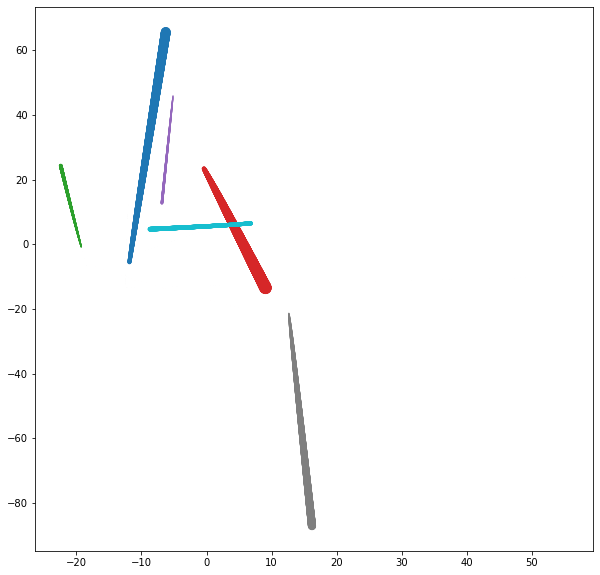

In [34]:
system.plot_history_2d(ZSIZE=True, SUBSET=False, n_sample=100)

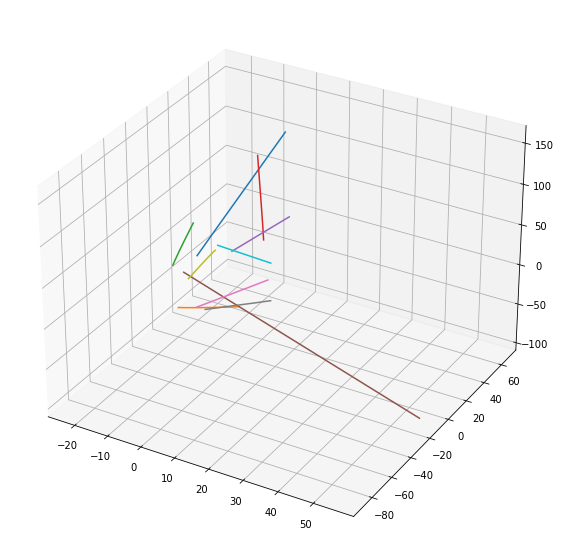

In [35]:
system.plot_history_3d()

## 2 Suns

In [36]:
X = np.array([
    [-1., 0., 0.], # Sun 
    [ 1., 0., 0.], # Sun 2
    [ 0., 0., 0.]  # Poor Planet
])

V = np.array([
    [0., -0.01, 0.], # Sun 
    [0.,  0.01, 0.], # Sun 2
    [ 0., 0.001, 0.]   # Poor Planet
])

M = np.array([
    1.,  # Sun
    1.,  # Sun2
    1e-5 # Poor Planet
])

In [37]:
S2_system = stf.System(X, V, M, dt=1)

In [55]:
S2_system.simulation(3*365)

100%|██████████| 1095/1095 [00:02<00:00, 449.30it/s]


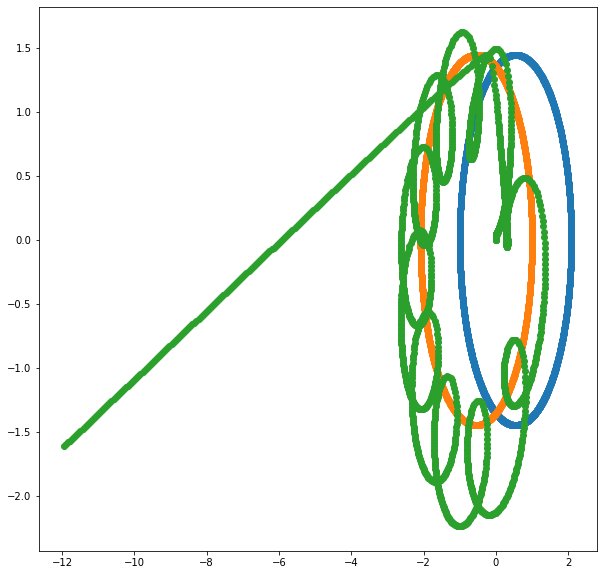

In [56]:
S2_system.plot_history_2d()

## Sun-Earth-Mars

In [40]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

In [41]:
SEM_system = stf.System(X, V, M)

In [42]:
SEM_system.simulation(3*365)

100%|██████████| 1095/1095 [00:03<00:00, 345.91it/s]


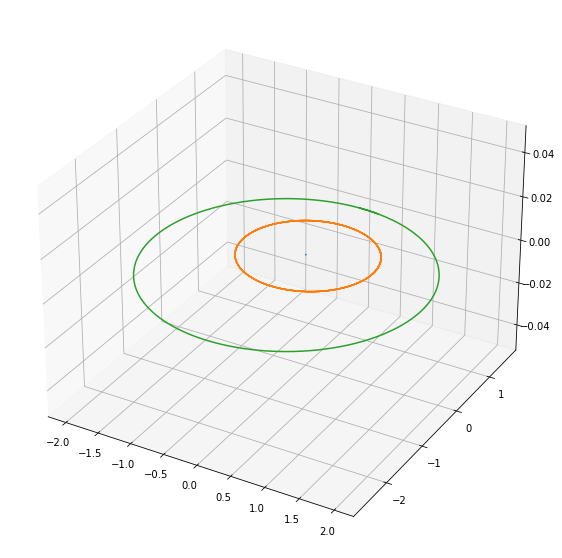

In [43]:
SEM_system.plot_history_3d()

## Earth Moon

In [44]:
X = np.array([
    [0., 0.,  0.], # Earth
    [383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0., 0.,          0.], # Earth
    [0., 1023./AU*ED, 0.]  # Moon
])

M = np.array([
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [45]:
EMo_system = stf.System(X, V, M, dt=0.1)

In [46]:
EMo_system.simulation(365)

100%|██████████| 365/365 [00:01<00:00, 269.08it/s]


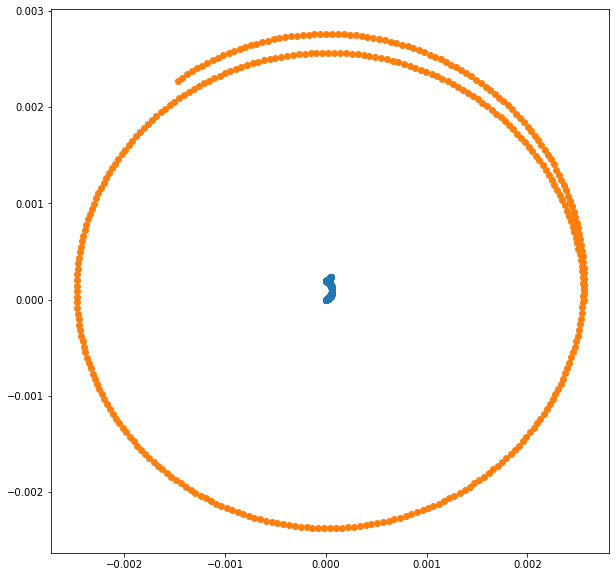

In [47]:
EMo_system.plot_history_2d()

## Sun Earth Moon

In [48]:
29290./AU*ED

0.016916390508491377

In [49]:
## Ecliptic tilt
sigma = 5. * np.pi / 180.

X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [1. + 383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0.,                     0., 0.], # Sun 
    [0.,           29290./AU*ED, 0.], # Earth
    [0., (29290. + 1023.)/AU*ED, 0.]  # Moon  # (29290. + 1023.*np.cos(sigma))/AU*ED, 1023.*np.sin(sigma)/AU*ED
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [50]:
SEMo_system = stf.System(X, V, M, dt=1)

In [51]:
SEMo_system.simulation(1*365)

100%|██████████| 365/365 [00:01<00:00, 285.83it/s]


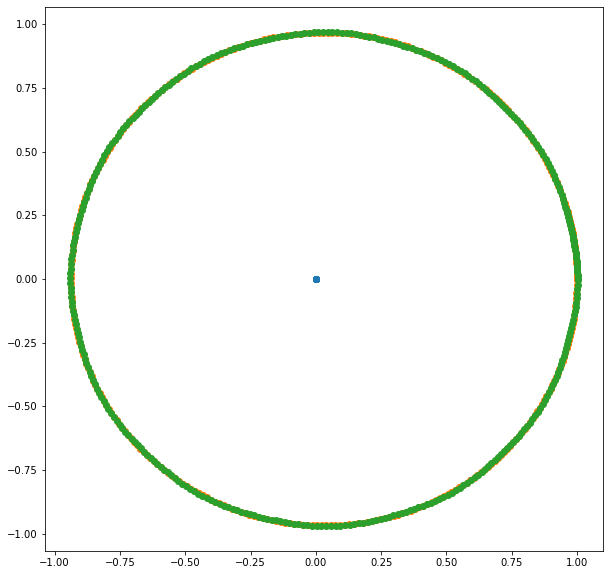

In [52]:
SEMo_system.plot_history_2d()

In [53]:
x_earth = SEMo_system._Q_hist[:, 1, :3]
x_moon  = SEMo_system._Q_hist[:, 2, :3]
x_diff = x_moon - x_earth

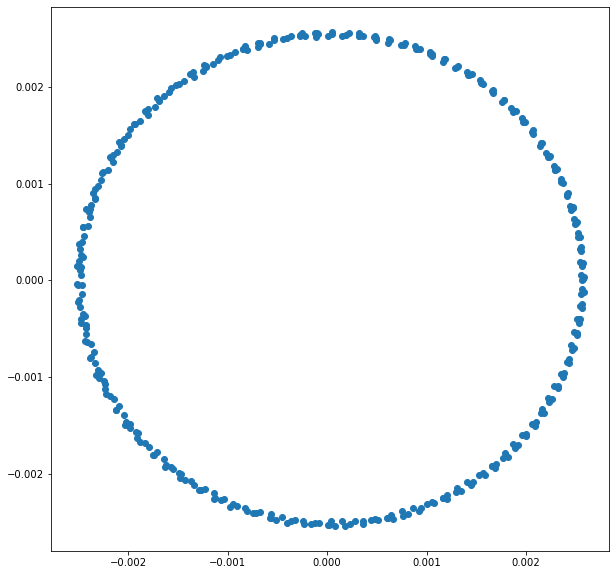

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(x_diff[:, 0], x_diff[:, 1])
plt.show()